In [1]:
import numpy as np 
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Full Dataset (league standings with players stats).csv')
lgStand = pd.read_csv('League Standings.csv')

In [3]:
lgStand.rename(columns = {'Team':'teamname','Season':'season'}, inplace = True)
lgStand

,Unnamed: 0,season,Standings,teamname,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,0,10/11,1,ManchesterUnited,38,23,11,4,78,37,41,80
1,1,10/11,2,Chelsea,38,21,8,9,69,33,36,71
2,2,10/11,3,ManchesterCity,38,21,8,9,60,33,27,71
3,3,10/11,4,Arsenal,38,19,11,8,72,43,29,68
4,4,10/11,5,TottenhamHotspur,38,16,14,8,55,46,9,62
...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,20/21,16,BrightonandHoveAlbion,38,9,14,15,40,46,-6,41
216,216,20/21,17,Burnley,38,10,9,19,33,55,-22,39
217,217,20/21,18,Fulham,38,5,13,20,27,53,-26,28
218,218,20/21,19,WestBromwichAlbion,38,5,11,22,35,76,-41,26


In [4]:
df = df.drop(df.filter(like = 'Unn'), axis = 1)

In [5]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
#Keep only data for players who have played in the season
df = df[df['minutes']!=0]
df

,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
1,19153,Gareth,Barry,39.0,England,183 cm,78 kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19203,Ashley,Cole,41.0,England,176 cm,66 kg,False,42,Arsenal,2.0,2.0,180.0,Defender,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50978,Justin,Hoyte,36.0,Trinidad and Tobago,180 cm,68 kg,False,42,Arsenal,1.0,0.0,1.0,Defender,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77110,Thomas,Løvendahl Sørensen,45.0,Denmark,196 cm,89 kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,NaN,False,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83026,Peter,Whittingham,34.0,England,178 cm,63 kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10761,50828,Zack,Steffen,27.0,USA,191 cm,86 kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,NaN,NaN,0.0,1.0,NaN,1.0,26.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,20/21,Kevin De Bruyne (2),1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0
10764,17,Christian,Pulisic,24.0,USA,172 cm,69 kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,NaN,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,NaN,33.0,13.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0
10766,2294,Willian,Borges da Silva,34.0,Brazil,175 cm,77 kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,NaN,677.0,32.0,23.0,13.0,NaN,8.0,106.0,56.0,18.0,13.0,NaN,21.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0
10767,18897,DeAndre Roselle,Yedlin,29.0,USA,172 cm,75 kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,NaN,0.0,0.0,NaN,NaN,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,NaN,4.0,4.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,20/21,Kevin De Bruyne (2),12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0


In [7]:
sumOfMetrics = df.groupby(df['season']).sum().reset_index()
avOfPassAcc = df.groupby(df['season']).mean().reset_index()

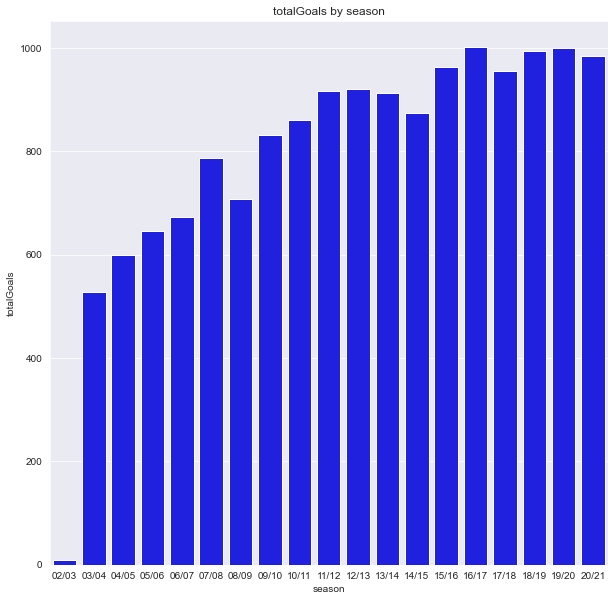

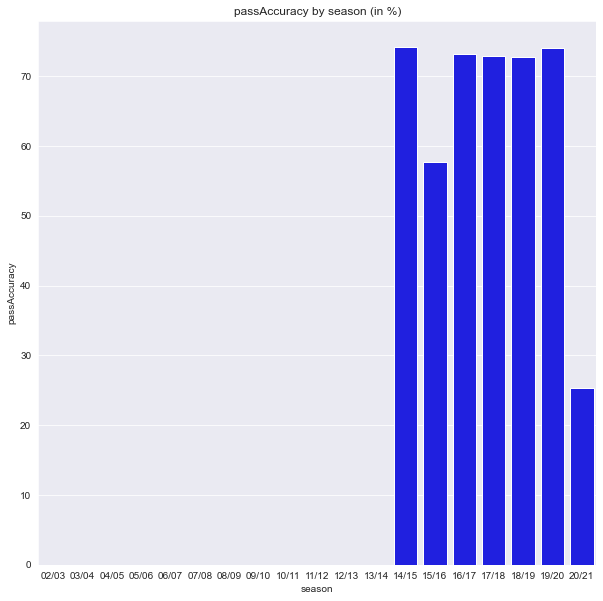

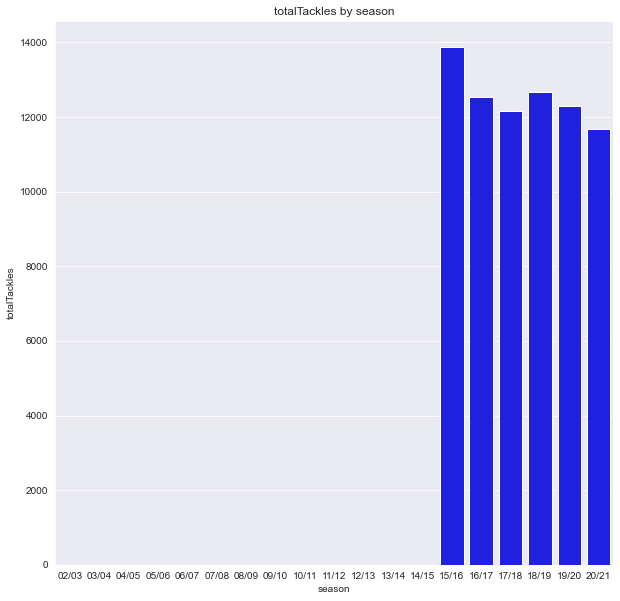

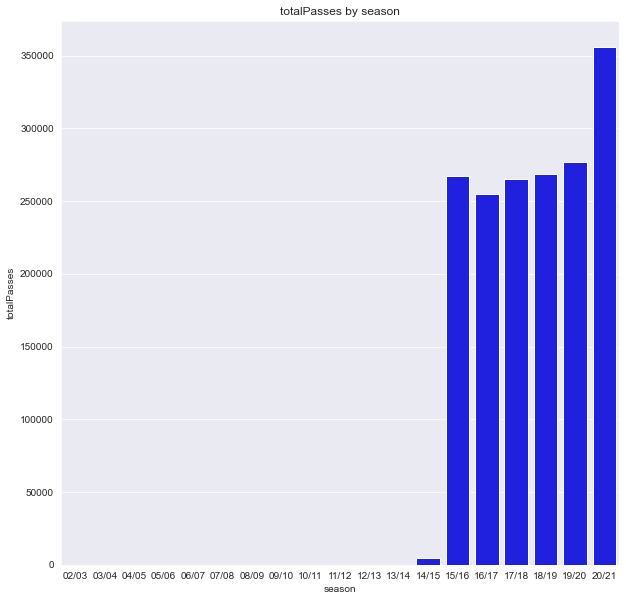

In [8]:
#General statistics throughout seasons
cols = ['totalGoals','passAccuracy','totalTackles','totalPasses']
sns.set_style('darkgrid')
sns.set_palette('Set2')
#ns.set_context("paper", rc={"axes.labelsize":25})
for col in cols: 
    if col == 'passAccuracy': 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=avOfPassAcc, \
                    x=avOfPassAcc['season'],\
                    y=avOfPassAcc[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season (in %)')
    else: 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=sumOfMetrics, \
                    x=sumOfMetrics['season'],\
                    y=sumOfMetrics[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season')

In [9]:
#Plot relationship between league position and number of goals
#Have to group by season and team
totalGoalSznTeam = df.groupby(['teamname','season']).sum().reset_index()
totalGoalSznTeam = totalGoalSznTeam.filter(['teamname', 'season'])

In [10]:
merged = totalGoalSznTeam.merge(lgStand, how = 'left', on = ['season','teamname'])
merged

,teamname,season,Unnamed: 0,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,Arsenal,02/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arsenal,03/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arsenal,04/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal,05/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arsenal,06/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
376,WolverhamptonWanderers,10/11,16.0,17.0,38.0,11.0,7.0,20.0,46.0,66.0,-20.0,40.0
377,WolverhamptonWanderers,11/12,39.0,20.0,38.0,5.0,10.0,23.0,40.0,82.0,-42.0,25.0
378,WolverhamptonWanderers,18/19,166.0,7.0,38.0,16.0,9.0,13.0,47.0,46.0,1.0,57.0
379,WolverhamptonWanderers,19/20,186.0,7.0,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0


In [11]:
to_merge = df.groupby(['season','teamname']).sum().reset_index()

In [12]:
forLinearReg = merged.merge(to_merge,how = 'left', on = ['season','teamname'])

In [13]:
forLinearReg = forLinearReg.drop(forLinearReg.filter(like = 'Unn'), axis = 1)

In [14]:
forLinearReg.dropna(inplace=True)

In [15]:
#Remove the data that is 0. We don't need data from 13/14 until the most recent data.
forLinearReg['to_remove'] = forLinearReg['season'].str[:2]
forLinearReg['to_remove'] = forLinearReg['to_remove'].astype(int)
forLinearRegMod = forLinearReg[forLinearReg['to_remove'] > 14]

In [16]:
to_generate = forLinearRegMod.columns
to_generate = to_generate[24:50]

In [17]:
#let's get some metrics aswell
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packag

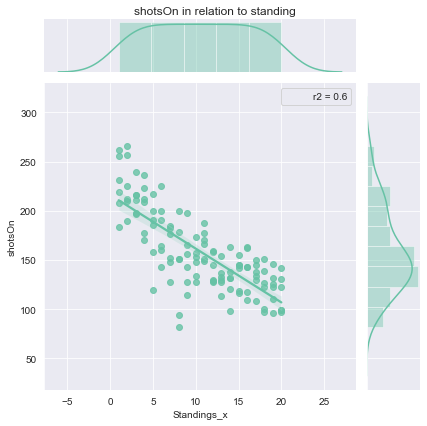

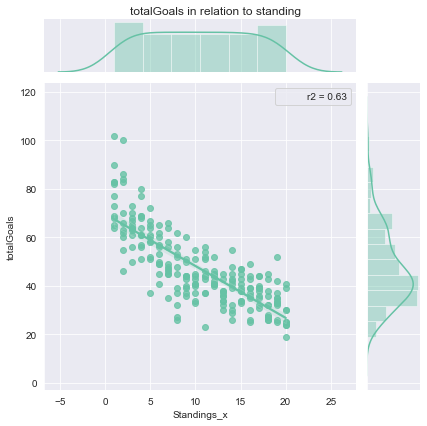

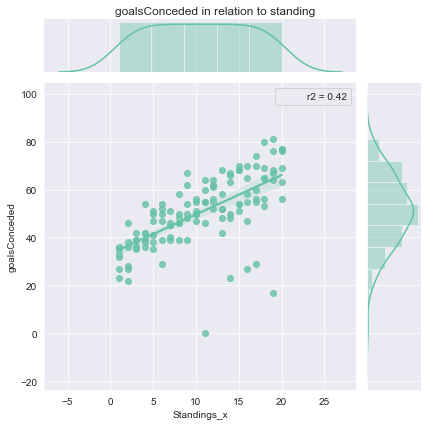

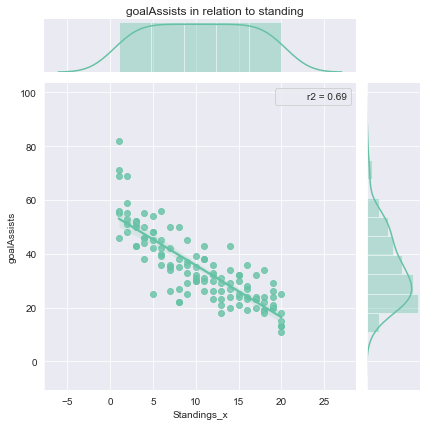

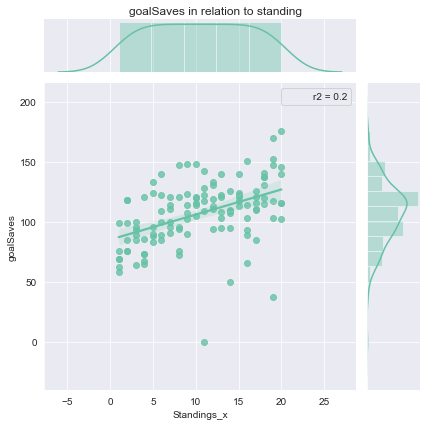

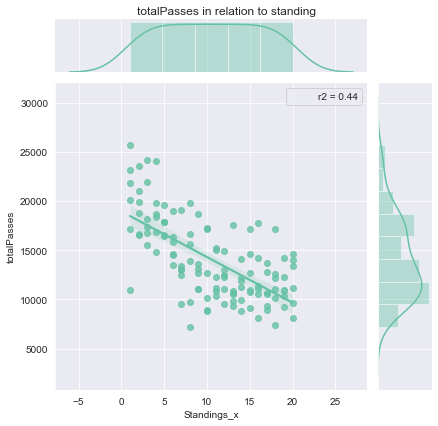

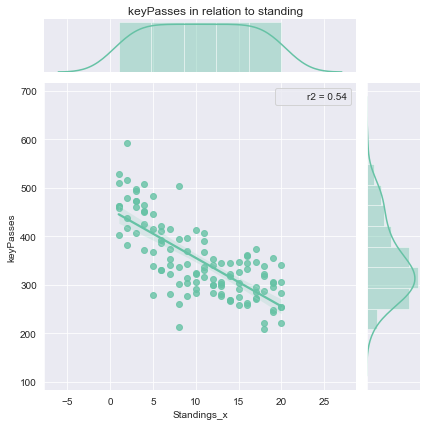

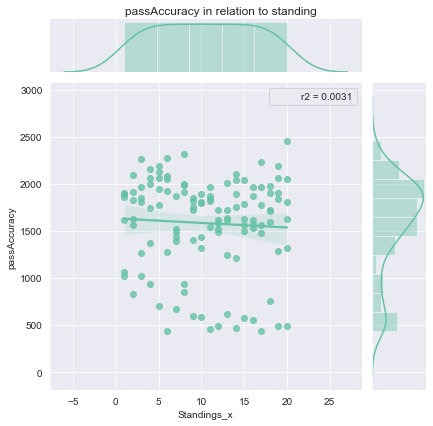

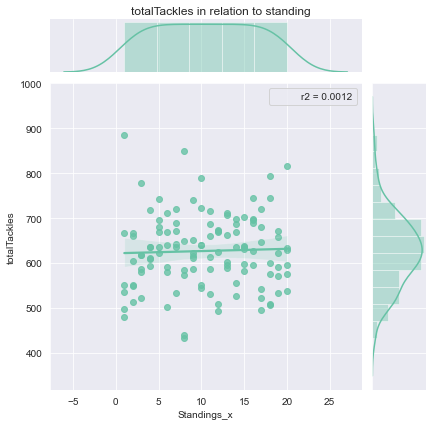

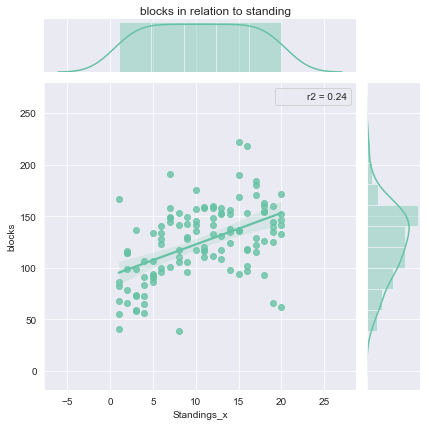

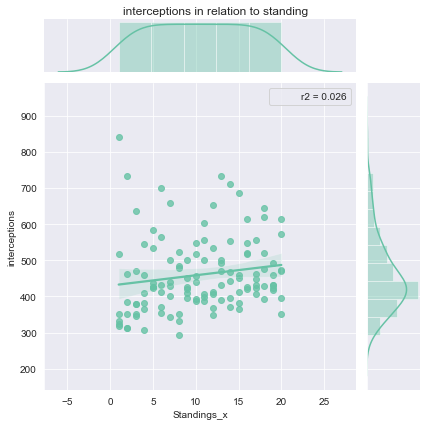

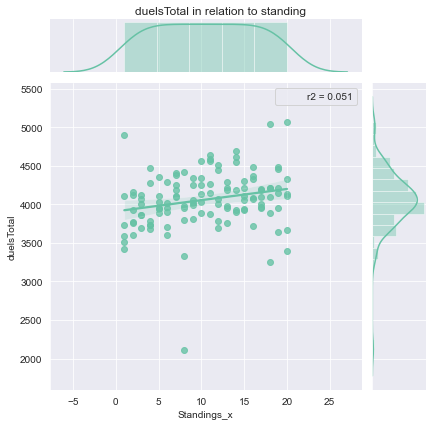

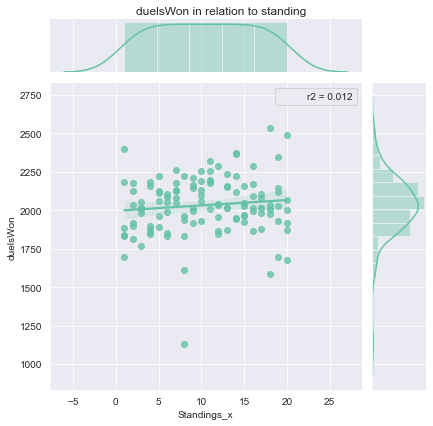

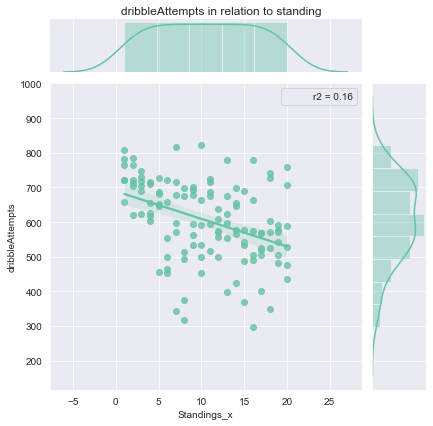

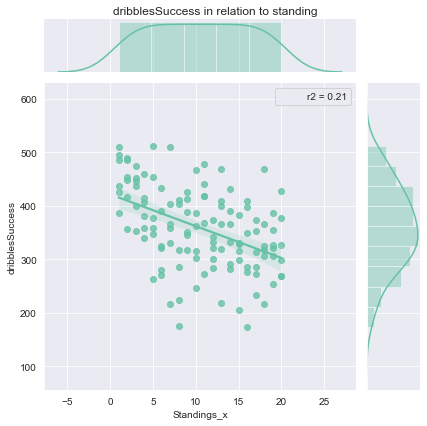

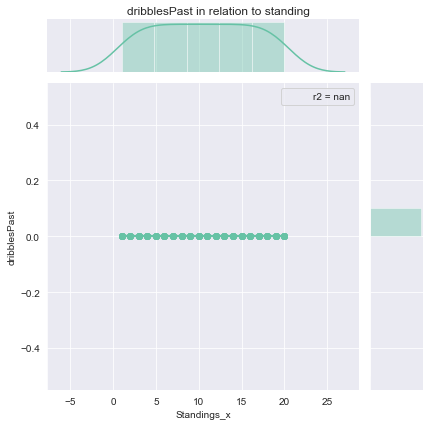

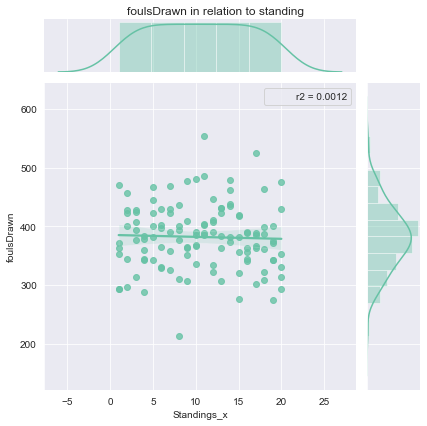

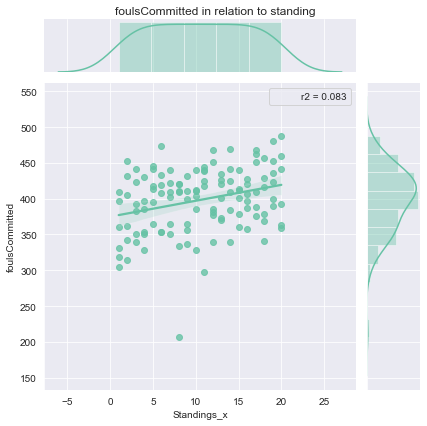

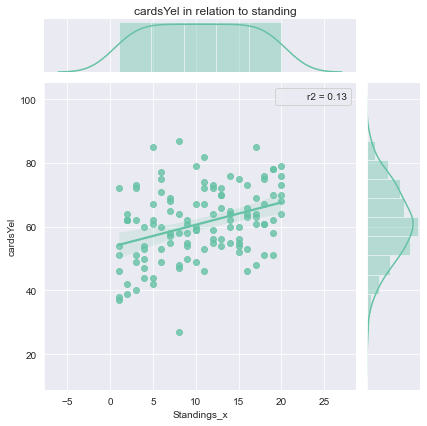

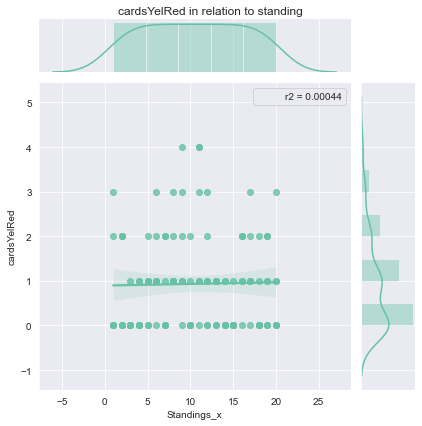

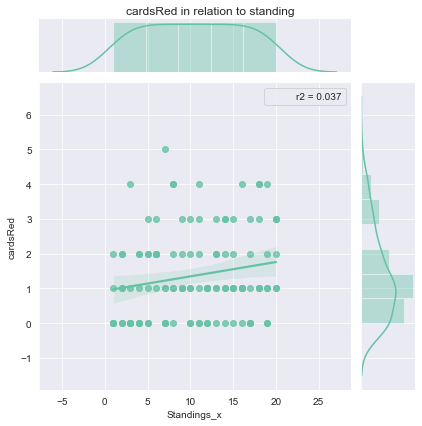

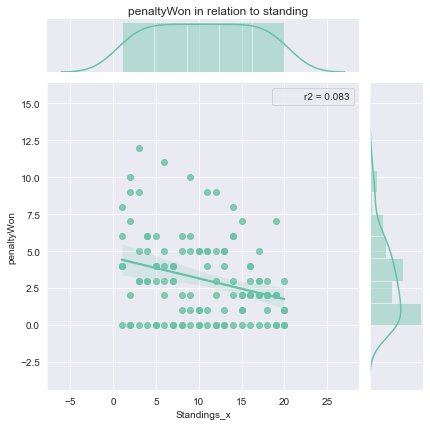

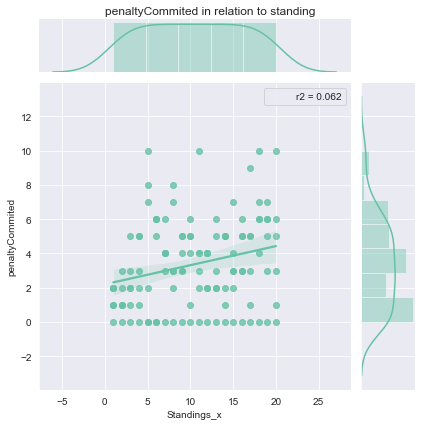

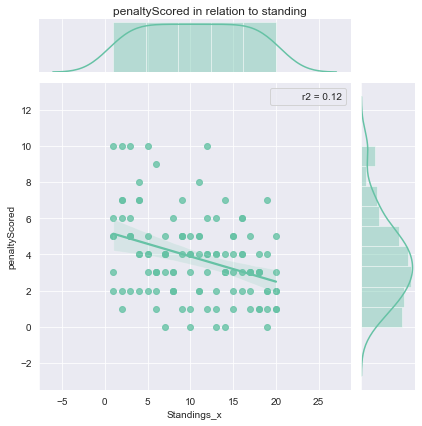

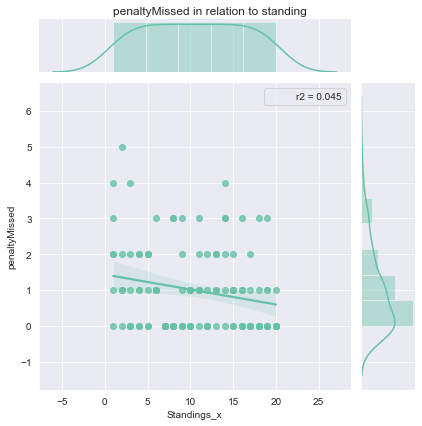

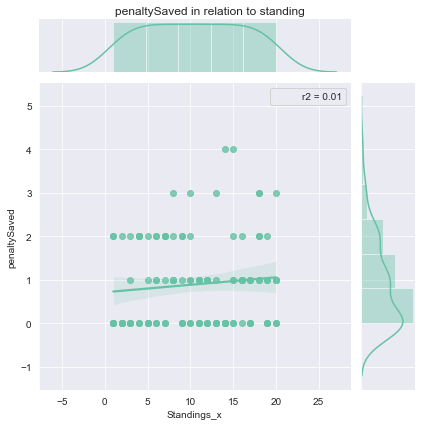

In [18]:
#Plot lin reg 
for col in to_generate:
    if col == 'totalGoals': 
        sns.jointplot(data=forLinearReg, x='Standings_x', y='totalGoals',kind="reg",stat_func=r2)
        plt.suptitle('totalGoals in relation to standing')
        plt.subplots_adjust(top=0.95)
    else: 
        sns.jointplot(data=forLinearRegMod, x='Standings_x', y=col,kind="reg",stat_func=r2)
        plt.suptitle(str(col)+ ' in relation to standing')
        plt.subplots_adjust(top=0.95)

#Intuitively enough, there seems to be a linear relationship with the final position with, the number of goals scored,
#the number of assists, key passes, total passes, shots on target. These attributes have the strongest relationship
#with the position. I expected a better relationship with duelsWon, interceptions, passAccuracy. 

#The r2 scores are not too strong but can still demonstrate some relationship between the variables

In [19]:
df.reset_index(inplace=True)

In [20]:
df['firstname_new'] = df['firstname'].str.split().str[0]

In [21]:
df['fullname_new'] = df['firstname_new'] + ' ' + df['lastname']

In [22]:
#Create a goal contribution column to see the % contributed to team goals
df.fillna(0, inplace=True)
df['Goal contribution'] = (df['totalGoals']+df['goalAssists'])/df['GoalsFor']

In [23]:
df['name'] = df['name'].str.replace(r'\([^)]*\)','', regex=True)
df = df.replace(r'[,\"\']','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)

In [24]:
df

,index,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,firstname_new,fullname_new,Goal contribution
0,1,19153,Gareth,Barry,39.0,England,183cm,78kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gareth,GarethBarry,NaN
1,2,19203,Ashley,Cole,41.0,England,176cm,66kg,False,42,Arsenal,2.0,2.0,180.0,Defender,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ashley,AshleyCole,NaN
2,4,50978,Justin,Hoyte,36.0,TrinidadandTobago,180cm,68kg,False,42,Arsenal,1.0,0.0,1.0,Defender,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Justin,JustinHoyte,NaN
3,5,77110,Thomas,LøvendahlSørensen,45.0,Denmark,196cm,89kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,0.000000,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thomas,ThomasLøvendahlSørensen,NaN
4,6,83026,Peter,Whittingham,34.0,England,178cm,63kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,PeterWhittingham,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,10761,50828,Zack,Steffen,27.0,USA,191cm,86kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20/21,KevinDeBruyne,1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0,Zack,ZackSteffen,0.000000
8287,10764,17,Christian,Pulisic,24.0,USA,172cm,69kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,0.0,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,0.0,33.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0,Christian,ChristianPulisic,0.103448
8288,10766,2294,Willian,BorgesdaSilva,34.0,Brazil,175cm,77kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,0.0,677.0,32.0,23.0,13.0,0.0,8.0,106.0,56.0,18.0,13.0,0.0,21.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0,Willian,WillianBorgesdaSilva,0.109091
8289,10767,18897,DeAndreRoselle,Yedlin,29.0,USA,172cm,75kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0,DeAndre,DeAndreYedlin,0.000000


In [25]:
df['PFA discrim'] = [x[0] in x[1] for x in zip(df['name'], df['fullname_new'])]

In [26]:
df

,index,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,firstname_new,fullname_new,Goal contribution,PFA discrim
0,1,19153,Gareth,Barry,39.0,England,183cm,78kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gareth,GarethBarry,NaN,False
1,2,19203,Ashley,Cole,41.0,England,176cm,66kg,False,42,Arsenal,2.0,2.0,180.0,Defender,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ashley,AshleyCole,NaN,False
2,4,50978,Justin,Hoyte,36.0,TrinidadandTobago,180cm,68kg,False,42,Arsenal,1.0,0.0,1.0,Defender,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Justin,JustinHoyte,NaN,False
3,5,77110,Thomas,LøvendahlSørensen,45.0,Denmark,196cm,89kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,0.000000,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thomas,ThomasLøvendahlSørensen,NaN,False
4,6,83026,Peter,Whittingham,34.0,England,178cm,63kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,PeterWhittingham,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,10761,50828,Zack,Steffen,27.0,USA,191cm,86kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20/21,KevinDeBruyne,1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0,Zack,ZackSteffen,0.000000,False
8287,10764,17,Christian,Pulisic,24.0,USA,172cm,69kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,0.0,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,0.0,33.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0,Christian,ChristianPulisic,0.103448,False
8288,10766,2294,Willian,BorgesdaSilva,34.0,Brazil,175cm,77kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,0.0,677.0,32.0,23.0,13.0,0.0,8.0,106.0,56.0,18.0,13.0,0.0,21.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0,Willian,WillianBorgesdaSilva,0.109091,False
8289,10767,18897,DeAndreRoselle,Yedlin,29.0,USA,172cm,75kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0,DeAndre,DeAndreYedlin,0.000000,False


In [27]:
PFAdf = df[df['PFA discrim'] == True]

In [28]:
PFAdf = PFAdf.drop(['index','id','firstname','lastname','height','weight','injured','teamID','goalsConceded','goalSaves','name','firstname_new','Played'],axis=1)

In [29]:
PFAdf

,age,nationality,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalAssists,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,Standings,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,fullname_new,Goal contribution,PFA discrim
89,37.0,France,Arsenal,37.0,37.0,3330.0,Attacker,0.000000,False,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03/04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ThierryHenry,inf,True
348,41.0,England,Chelsea,36.0,36.0,3240.0,Defender,0.000000,False,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JohnTerry,inf,True
2004,41.0,Wales,ManchesterUnited,28.0,15.0,1499.0,Midfielder,0.000000,False,13.0,3.0,17.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,08/09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RyanGiggs,inf,True
3105,33.0,Wales,TottenhamHotspur,30.0,29.0,2452.0,Attacker,0.000000,False,1.0,4.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/11,5.0,16.0,14.0,8.0,55.0,46.0,9.0,62.0,GarethBale,0.127273,True
3195,36.0,Netherlands,Arsenal,38.0,37.0,3334.0,Attacker,0.000000,False,1.0,3.0,1.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11/12,3.0,21.0,7.0,10.0,74.0,49.0,25.0,70.0,RobinvanPersie,0.405405,True
4111,33.0,Wales,TottenhamHotspur,33.0,33.0,2925.0,Attacker,0.000000,False,0.0,4.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/13,5.0,21.0,9.0,8.0,66.0,46.0,20.0,72.0,GarethBale,0.318182,True
4601,35.0,Uruguay,Liverpool,33.0,33.0,2964.0,Attacker,0.000000,False,0.0,3.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13/14,2.0,26.0,6.0,6.0,101.0,50.0,51.0,84.0,LuisSuárezDíaz,0.306931,True
5147,31.0,Belgium,Chelsea,38.0,38.0,3379.0,Attacker,6.700000,False,0.0,12.0,0.0,0.0,0.0,14.0,1.0,32.0,1.0,84.0,0.0,0.0,2.0,16.0,6.0,4.0,2.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14/15,1.0,26.0,9.0,3.0,73.0,32.0,41.0,87.0,EdenHazard,0.205479,True
5592,31.0,Algeria,LeicesterCity,37.0,36.0,3057.0,Attacker,7.351351,False,1.0,24.0,2.0,76.0,39.0,17.0,11.0,843.0,69.0,54.0,53.0,5.0,38.0,644.0,302.0,232.0,131.0,0.0,83.0,19.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,15/16,1.0,23.0,12.0,3.0,68.0,36.0,32.0,81.0,RiyadMahrez,0.411765,True
6147,31.0,France,Chelsea,35.0,35.0,3139.0,Midfielder,7.220000,False,0.0,1.0,1.0,27.0,7.0,1.0,1.0,1884.0,23.0,87.0,127.0,4.0,82.0,377.0,197.0,49.0,36.0,0.0,15.0,53.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16/17,1.0,30.0,3.0,5.0,85.0,33.0,52.0,93.0,NGoloKanté,0.023529,True


In [30]:
#Analysis idea: based on position, see how the player ranks compared to other players in the same position

In [31]:
#Creating bell curves of given attributes to see how the players compares to other players

In [32]:
PFAdf.index

Int64Index([89, 348, 2004, 3105, 3195, 4111, 4601, 5147, 5592, 6147, 6533,
            7009, 7402, 7909],
           dtype='int64')

2.3033409721384634
6.349489511864663


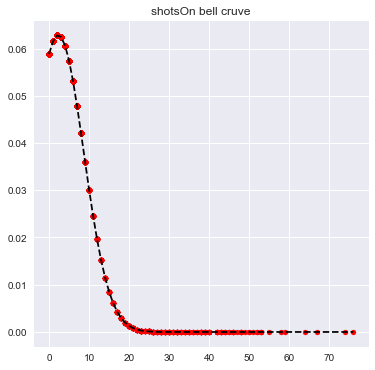

1.8295742371245929
3.3424746915917702


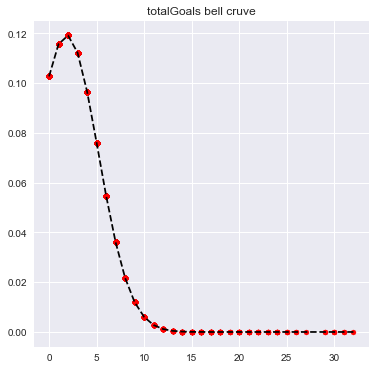

0.7317573272222893
5.427846340514993


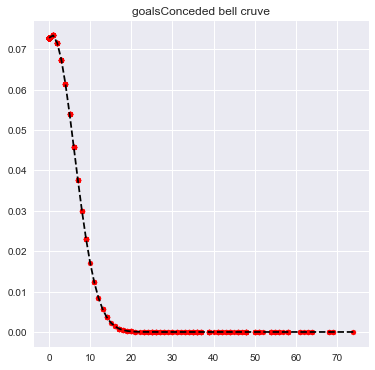

0.5044023640091666
1.4896656553638796


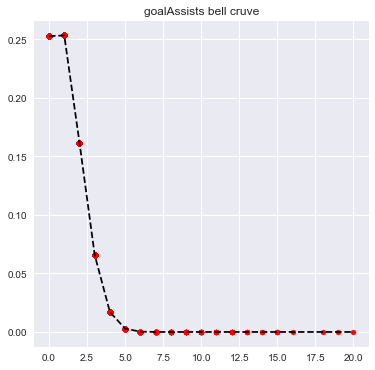

1.5554215414304668
11.730722573861268


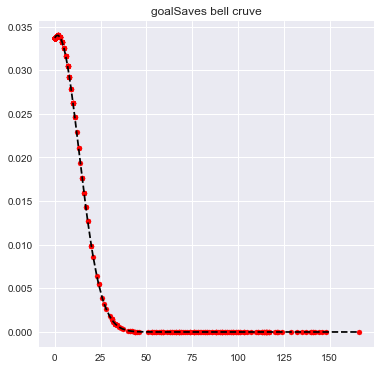

204.18875889518756
410.2489410770557


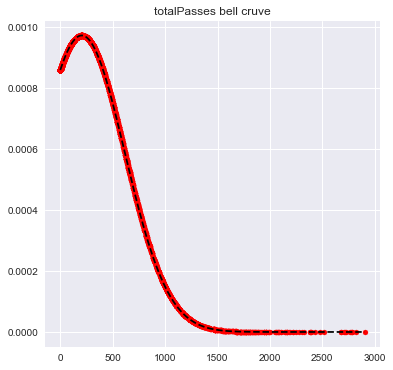

5.088047280183331
12.462742572023735


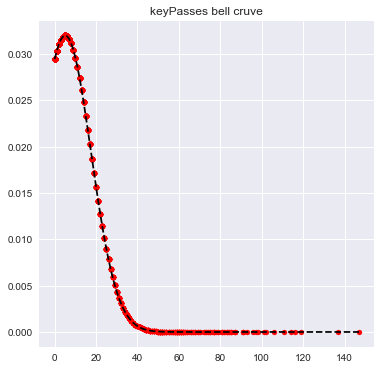

24.06597515378121
33.76718467709219


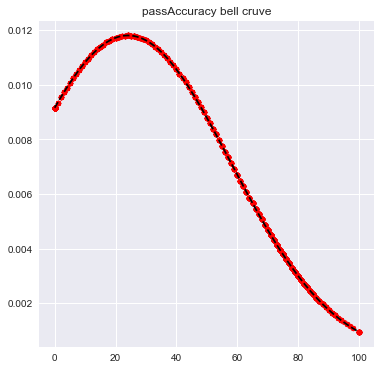

9.072005789410204
19.16051455784282


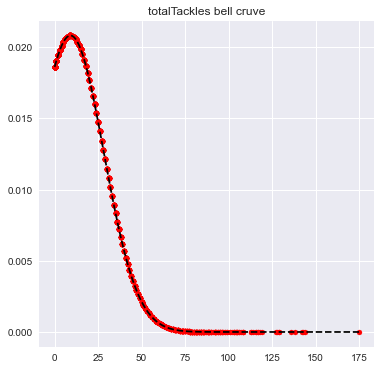

1.7965263538776988
5.142871802543399


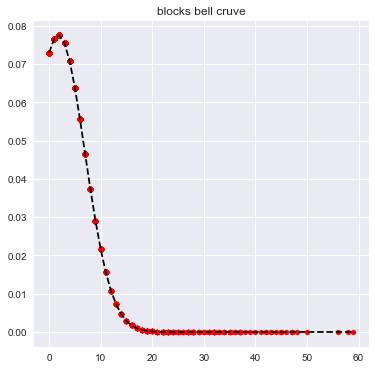

6.679893860812929
15.161767671592386


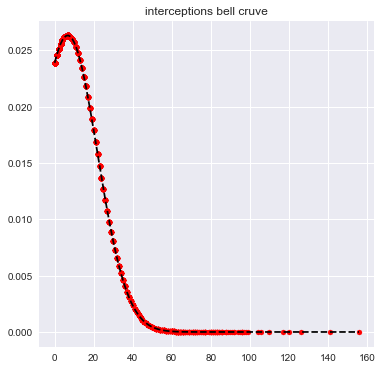

58.97623929562176
113.11070630249122


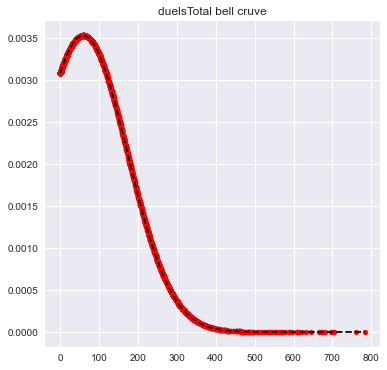

29.507658907248825
56.934299372345855


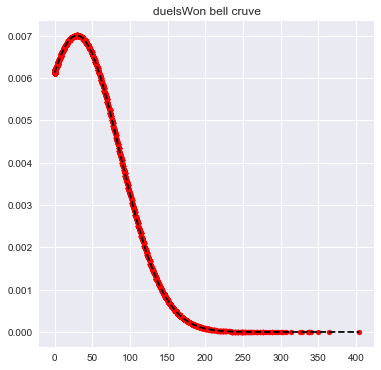

8.786997949583887
22.42544258244572


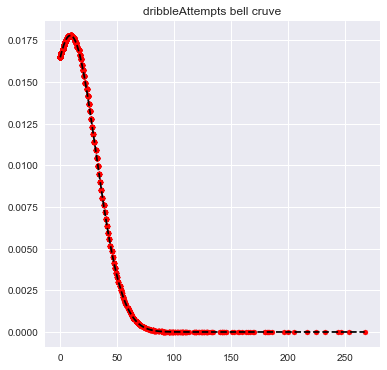

5.210831021589676
13.362961696835471


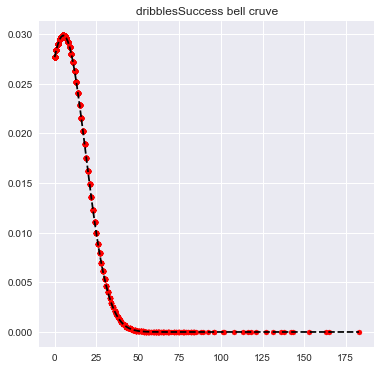

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


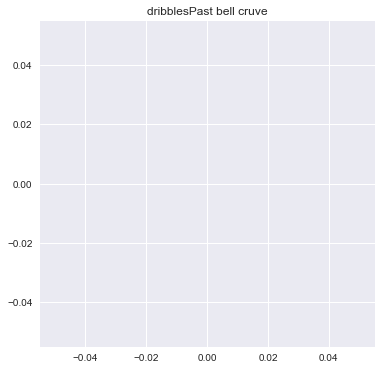

5.5420335303340975
12.164415110157286


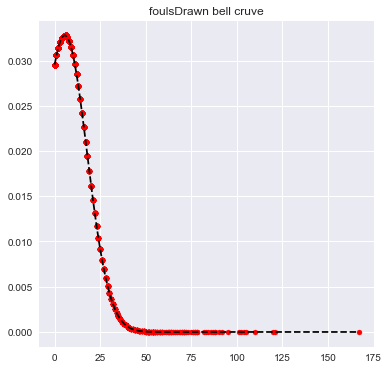

5.781087926667471
11.475289402281222


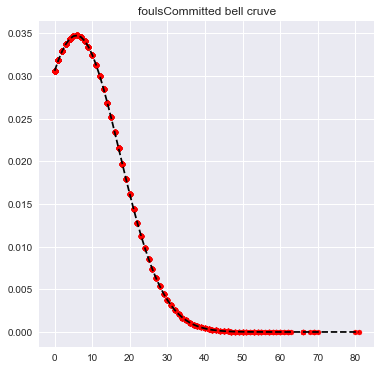

2.232300084428899
2.4590382059843976


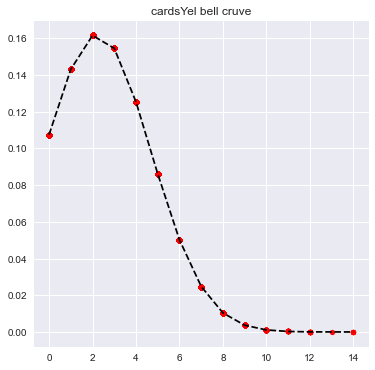

0.03811361717525027
0.19888608413608674


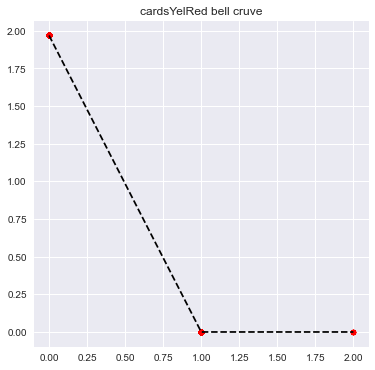

0.05765287661319503
0.244698196172538


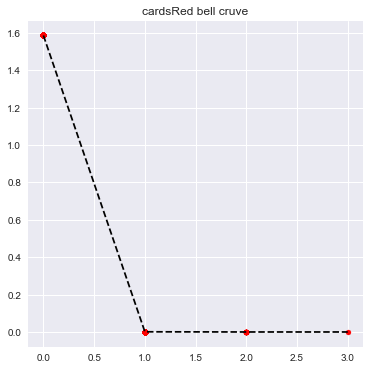

0.044867929079725005
0.282422180554703


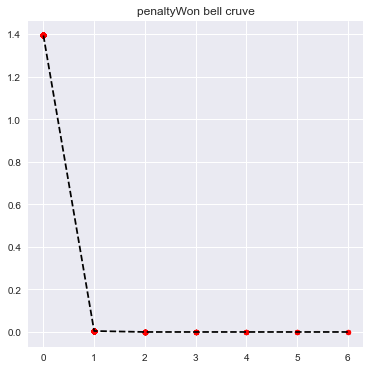

0.04872753588228199
0.2529083216618011


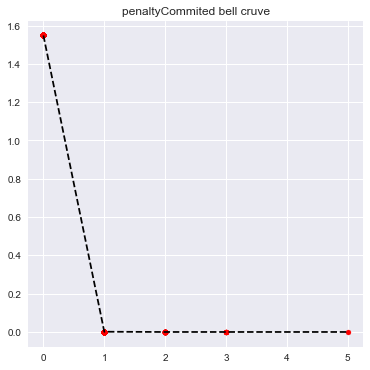

0.05548184778675672
0.42654620577815794


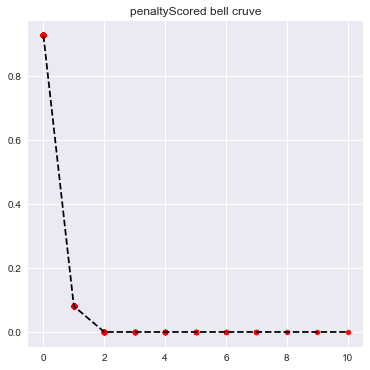

0.014352912797008805
0.13508419196548138


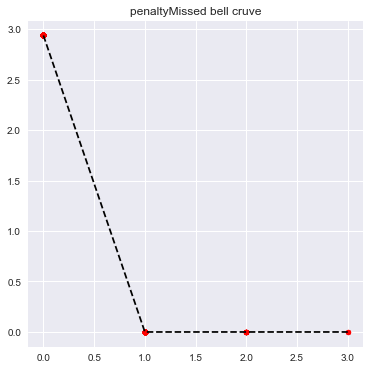

0.012905560246049934
0.14047969280440514


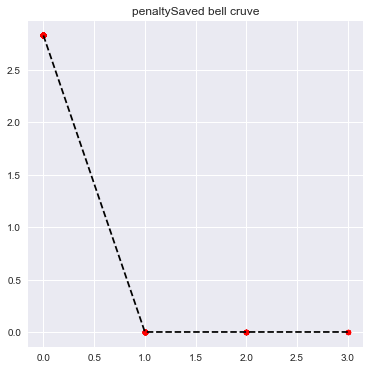

In [33]:
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    print(mean)
    std = np.std(x)
    print(std)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

for col in to_generate:
    # To generate an array of x-values
    x = df[col].sort_values(ascending = True)

    # To generate an array of
    # y-values using corresponding x-values
    y = pdf(df[col].sort_values(ascending = True))

    # Plotting the bell-shaped curve
    plt.style.use('seaborn')
    plt.figure(figsize = (6, 6))
    plt.plot(x, y, color = 'black',\
            linestyle = 'dashed')
    plt.scatter( x, y, marker = 'o', s = 25, color='red')
    #, ls="", marker="o", label="points")
    plt.title(str(col)+ ' bell cruve')
    plt.show()


In [34]:
df

,index,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,firstname_new,fullname_new,Goal contribution,PFA discrim
0,1,19153,Gareth,Barry,39.0,England,183cm,78kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gareth,GarethBarry,NaN,False
1,2,19203,Ashley,Cole,41.0,England,176cm,66kg,False,42,Arsenal,2.0,2.0,180.0,Defender,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ashley,AshleyCole,NaN,False
2,4,50978,Justin,Hoyte,36.0,TrinidadandTobago,180cm,68kg,False,42,Arsenal,1.0,0.0,1.0,Defender,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Justin,JustinHoyte,NaN,False
3,5,77110,Thomas,LøvendahlSørensen,45.0,Denmark,196cm,89kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,0.000000,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thomas,ThomasLøvendahlSørensen,NaN,False
4,6,83026,Peter,Whittingham,34.0,England,178cm,63kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,PeterWhittingham,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,10761,50828,Zack,Steffen,27.0,USA,191cm,86kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20/21,KevinDeBruyne,1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0,Zack,ZackSteffen,0.000000,False
8287,10764,17,Christian,Pulisic,24.0,USA,172cm,69kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,0.0,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,0.0,33.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0,Christian,ChristianPulisic,0.103448,False
8288,10766,2294,Willian,BorgesdaSilva,34.0,Brazil,175cm,77kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,0.0,677.0,32.0,23.0,13.0,0.0,8.0,106.0,56.0,18.0,13.0,0.0,21.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0,Willian,WillianBorgesdaSilva,0.109091,False
8289,10767,18897,DeAndreRoselle,Yedlin,29.0,USA,172cm,75kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0,DeAndre,DeAndreYedlin,0.000000,False


In [35]:
#The bell curve is not very standerdized. To compare how our players of the year did in comparison to the group,
#we should create the same visuals but for a specific position.

In [42]:
dfAttacker = df[df['position']=='Attacker']
dfMidfield = df[df['position']=='Midfielder']
dfDefender = df[df['position']=='Defender']

In [45]:
for index, row in PFAdf.iterrows(): 
    print(row['fullname_new'])

ThierryHenry
JohnTerry
RyanGiggs
GarethBale
RobinvanPersie
GarethBale
LuisSuárezDíaz
EdenHazard
RiyadMahrez
NGoloKanté
MohamedSalahGhaly
VirgilvanDijk
KevinDeBruyne
KevinDeBruyne


ATTACKERS BELL CURVE
4.871018276762402
10.409955606318155


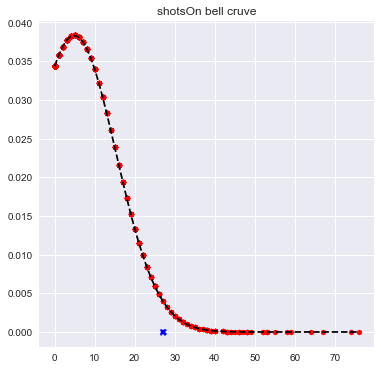

4.333159268929504
5.3402968002332205


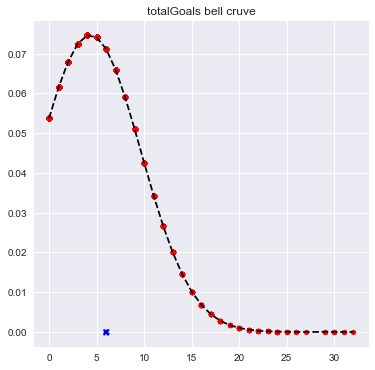

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


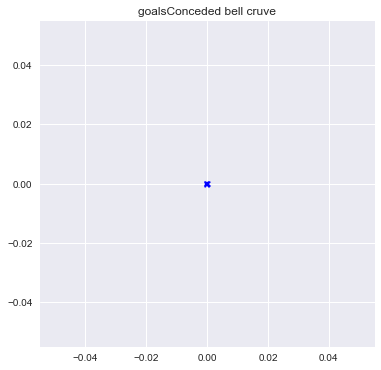

0.7107049608355092
1.7738645908245485


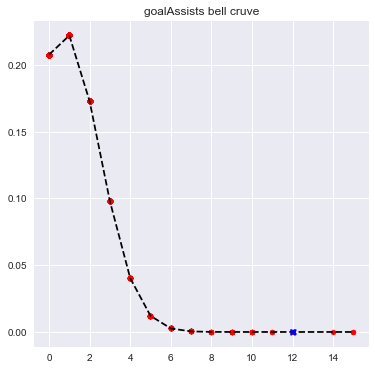

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


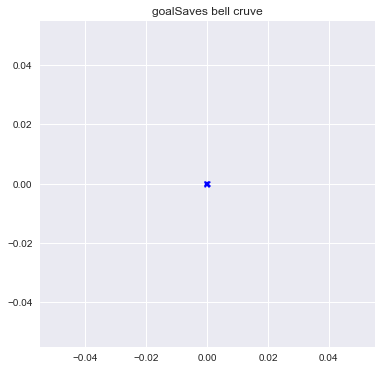

110.49660574412533
231.67174122103273


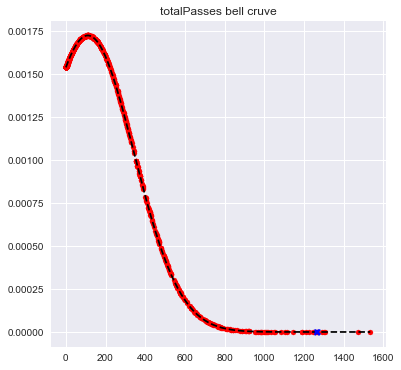

6.1639686684073105
13.474364284294015


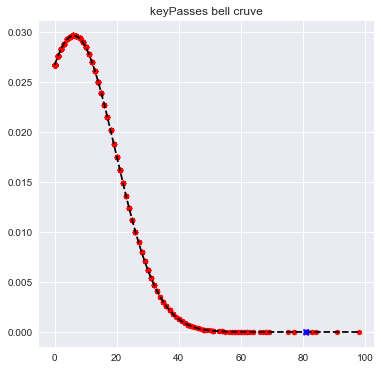

21.517493472584857
31.778691022708987


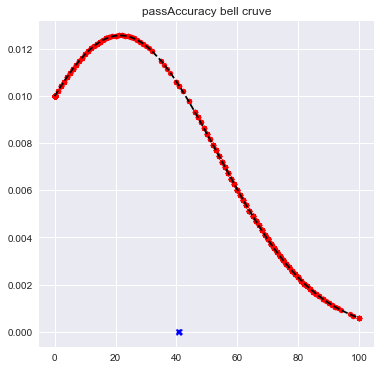

4.898172323759791
10.613680112801802


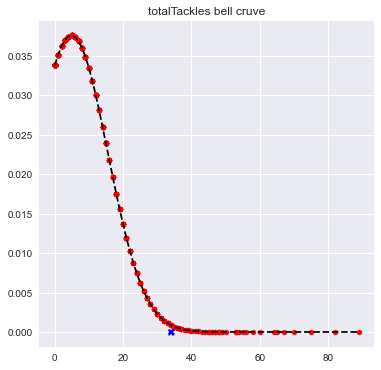

0.404177545691906
1.1085159508938698


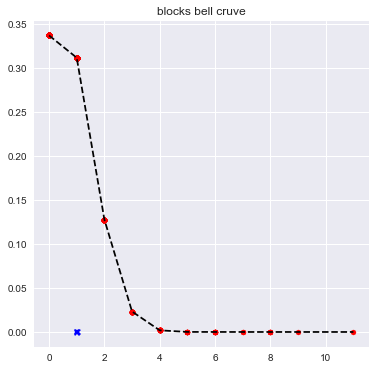

2.210443864229765
5.349517004269049


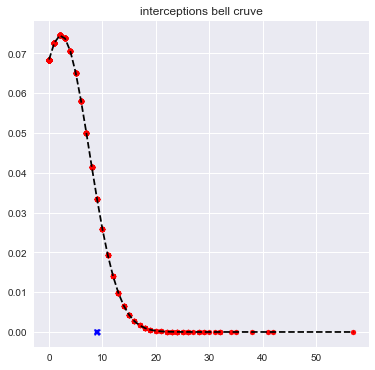

71.18955613577023
140.04619191551743


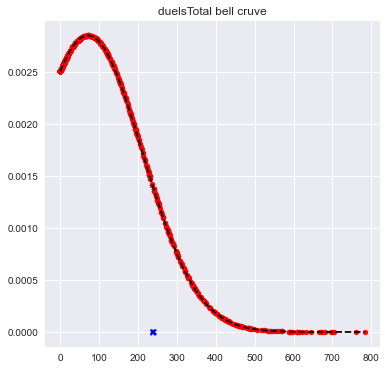

30.394778067885117
61.87186940269518


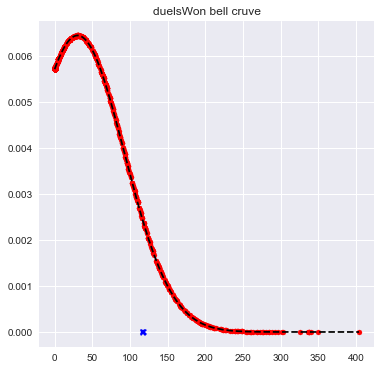

13.851174934725849
32.820363869407494


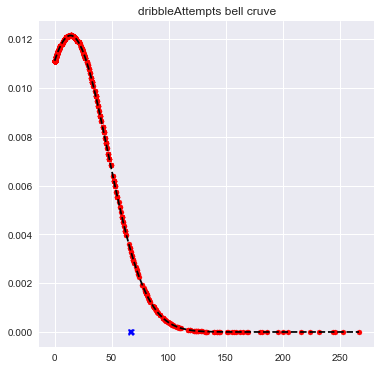

7.609921671018276
18.998139409906702


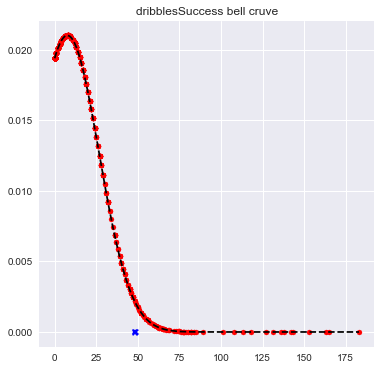

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


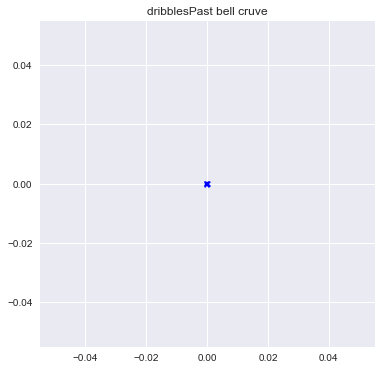

7.230287206266318
15.740809301405184


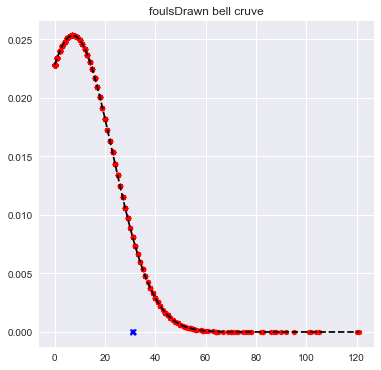

6.118537859007833
12.143014020705547


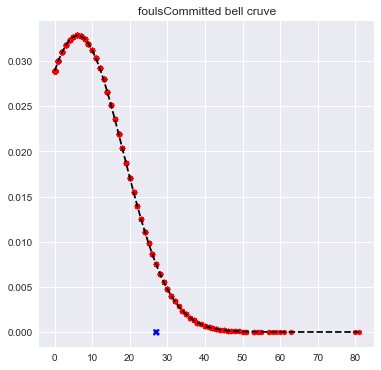

1.556135770234987
1.9589408611525942


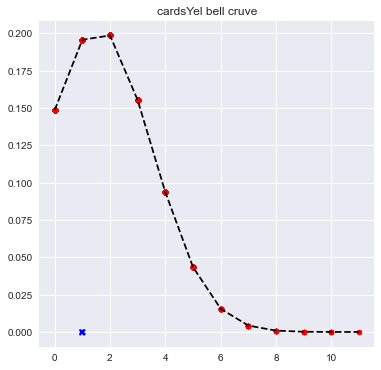

0.020887728459530026
0.15013395387214712


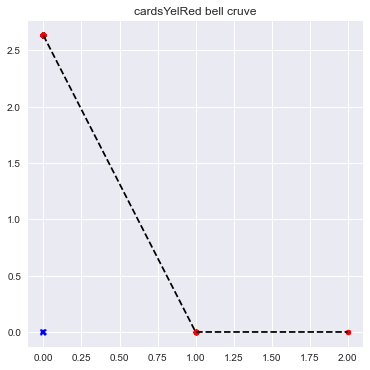

0.04699738903394256
0.21408647991153332


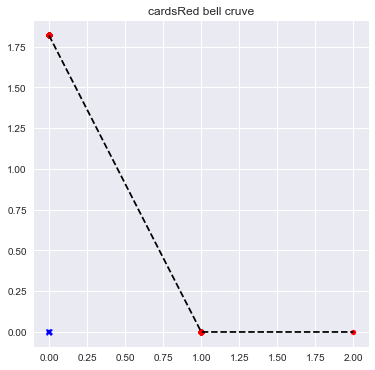

0.11174934725848563
0.4739069543728688


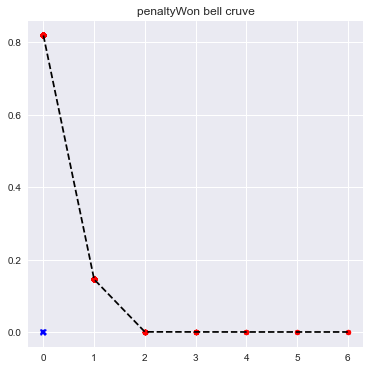

0.011488250652741514
0.10656580478596922


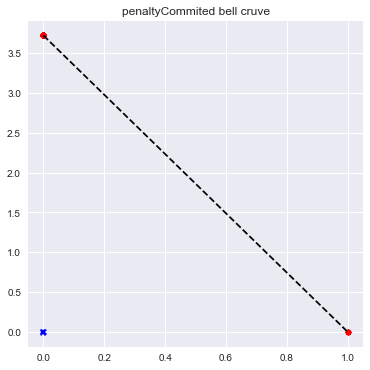

0.14516971279373367
0.6582050200979653


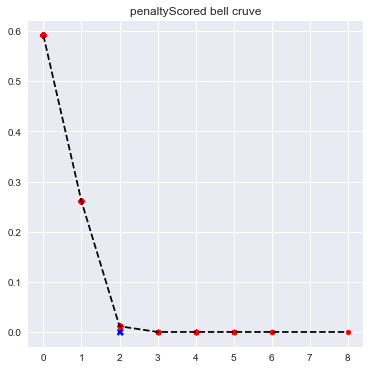

0.03759791122715405
0.21350359740598665


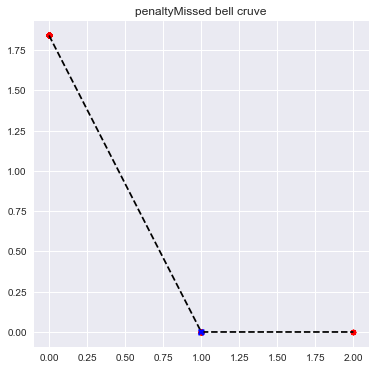

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


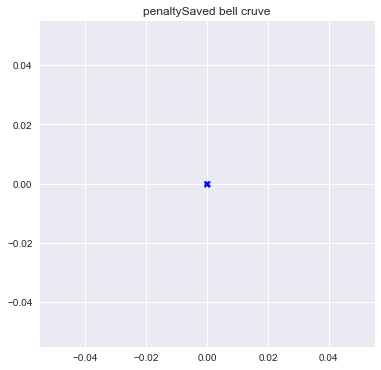

MIDFIELDERS BELL CURVE
2.4217285664699757
5.619318830050362


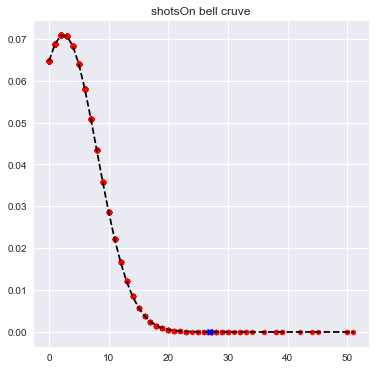

1.7212773342589378
2.384957028452157


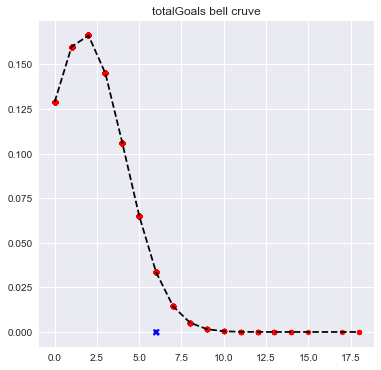

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


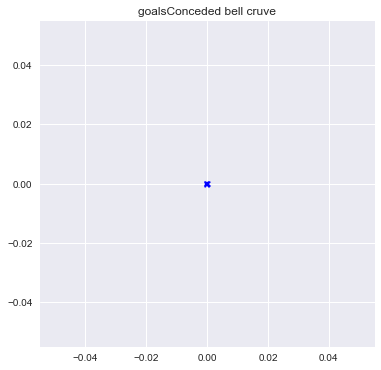

0.6643526553280111
1.7845055101898695


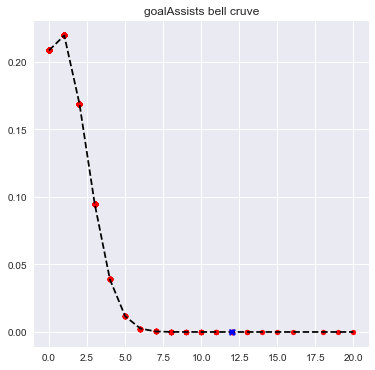

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


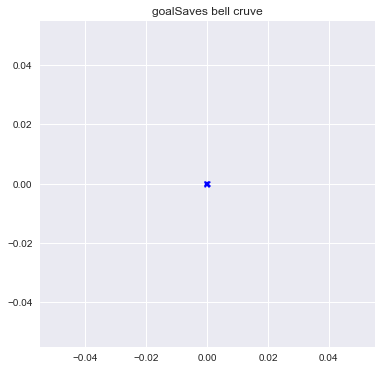

246.5446025685526
465.5075400871792


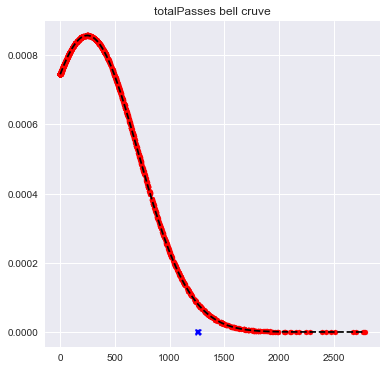

7.282540784449844
15.71054571682337


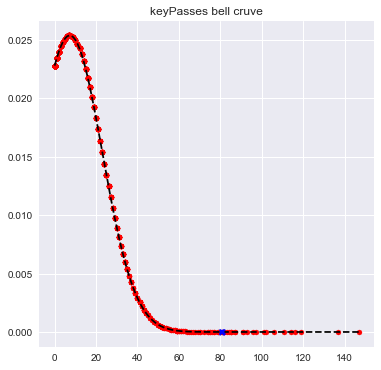

26.643179451579314
35.9050542691052


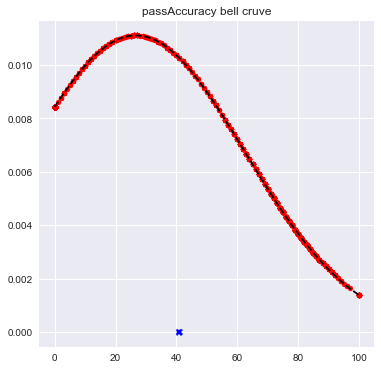

11.86463033668865
22.876843094247068


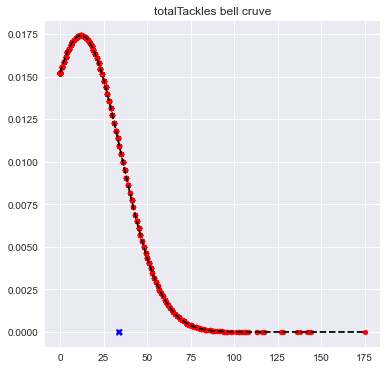

1.3502256161055188
3.2320646196250316


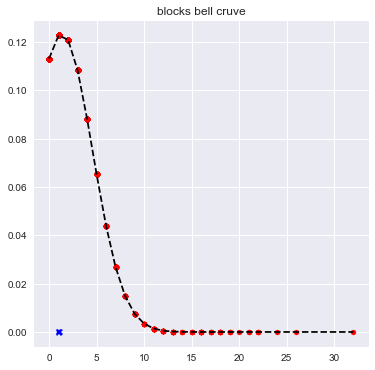

7.7066990628254075
15.946338779851834


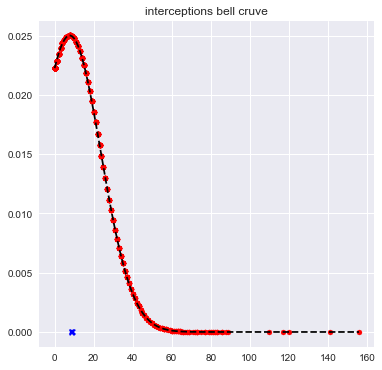

65.57931273863242
114.32057286308073


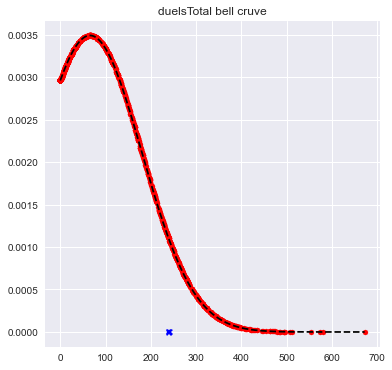

31.865671641791046
56.99301495691366


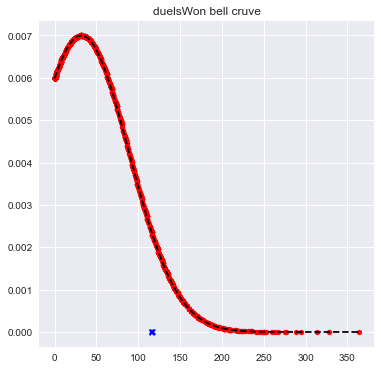

11.011801457827143
22.900942678126558


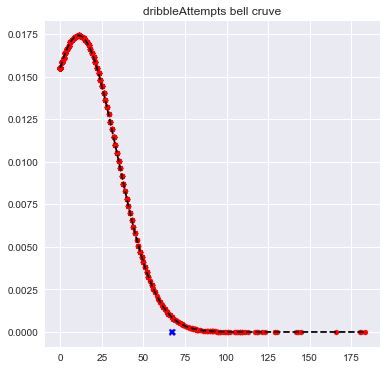

6.807358556056925
14.142013935046615


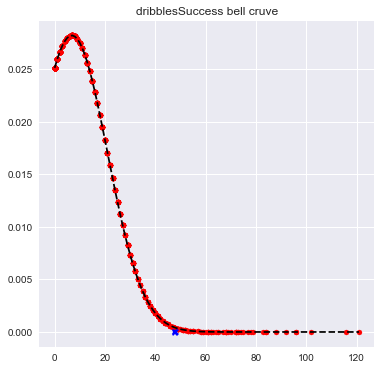

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


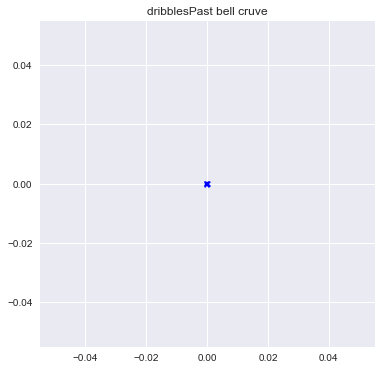

6.798333911836168
13.381641181967764


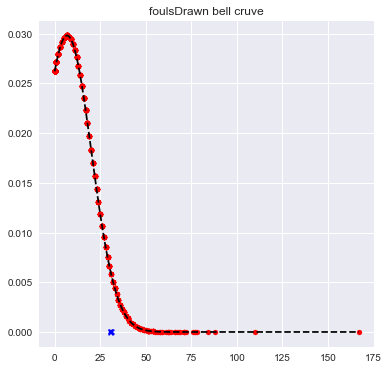

7.093370357514752
13.129793990667075


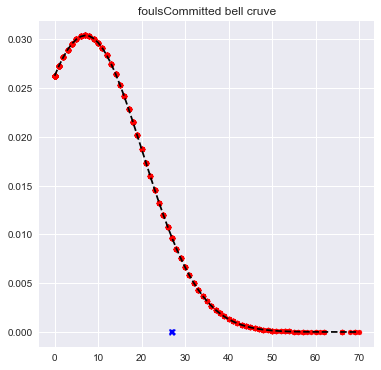

2.7011454356126343
2.715970624255008


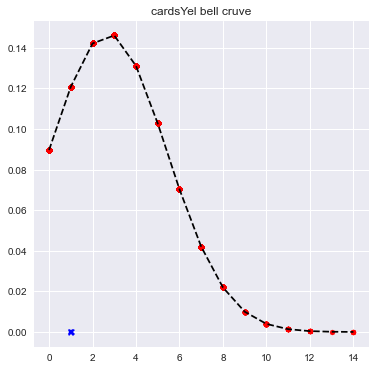

0.047552933009371745
0.2254889770794825


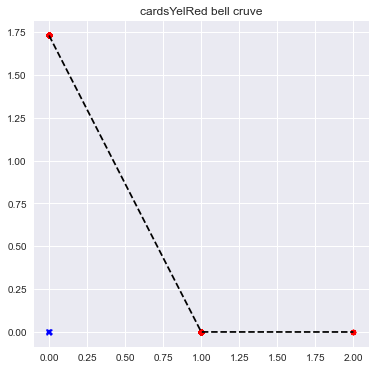

0.0572717806317251
0.24259255468000956


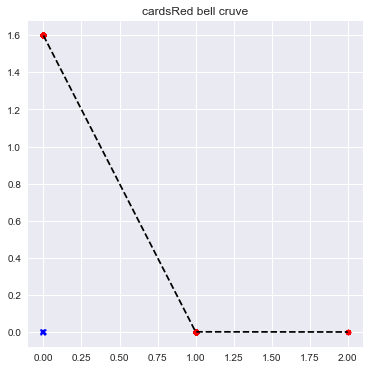

0.03852828878861506
0.23911452987624876


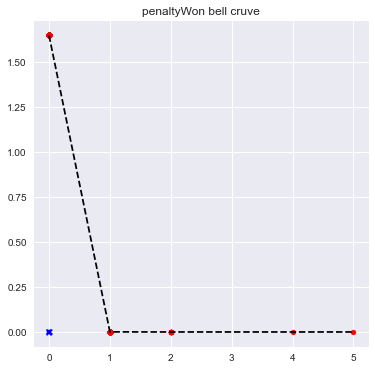

0.03818118708781673
0.21388788713047446


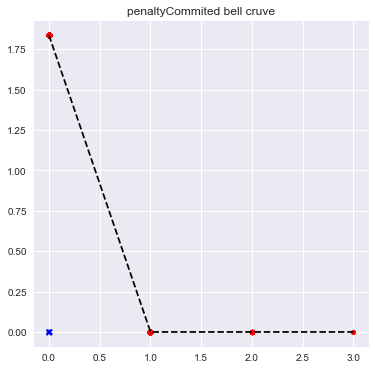

0.05970149253731343
0.47048659269541077


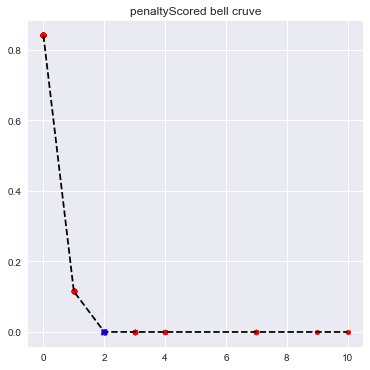

0.016313779937521693
0.14697369742387634


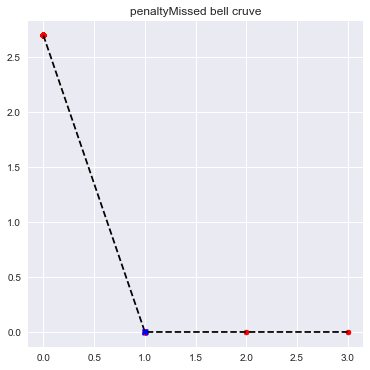

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


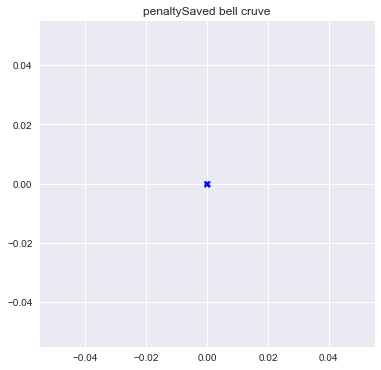

DEFENDERS BELL CURVE
0.9989258861439313
2.288610068671072


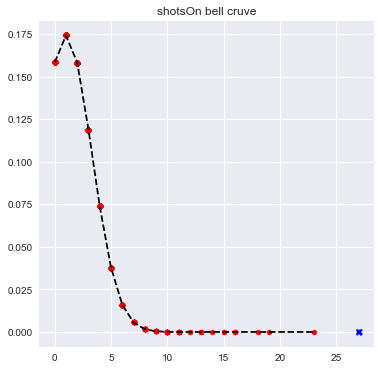

0.6713211600429646
1.116274945842271


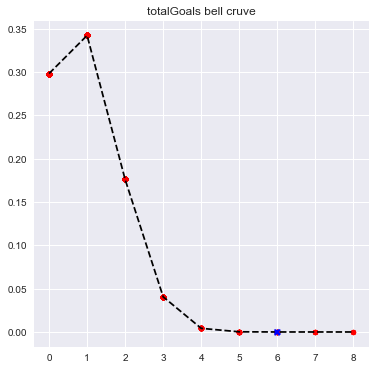

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


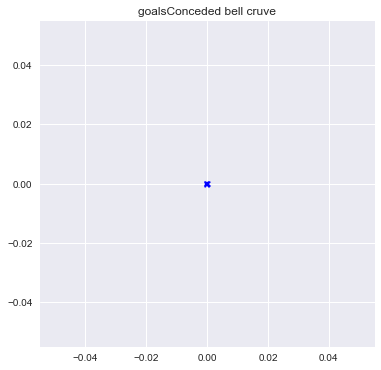

0.32116004296455425
0.9960393175176849


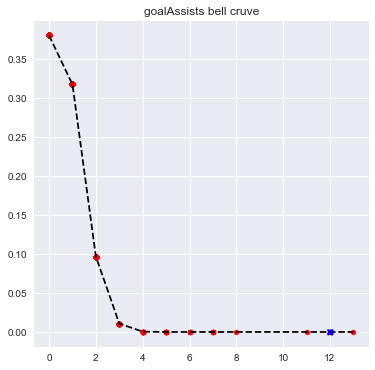

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


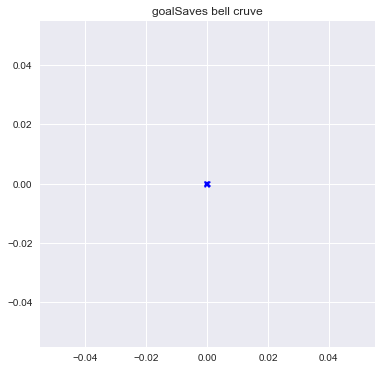

247.8857858933047
462.2327561535758


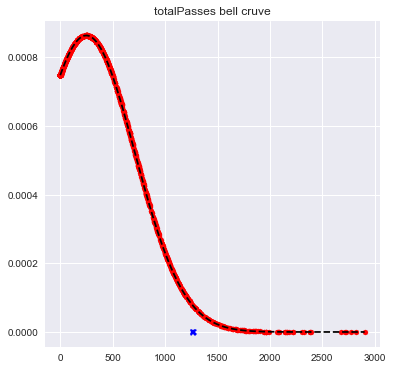

3.327604726100967
8.180457568363163


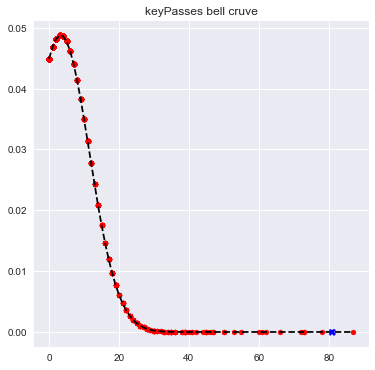

25.088793412101683
34.2477127496647


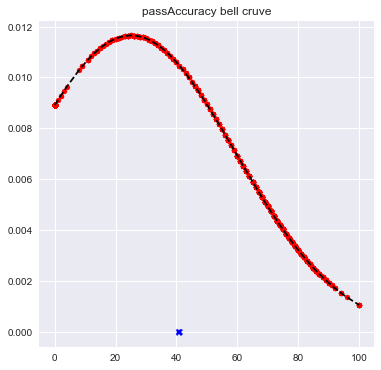

11.298603651987111
20.680137478449016


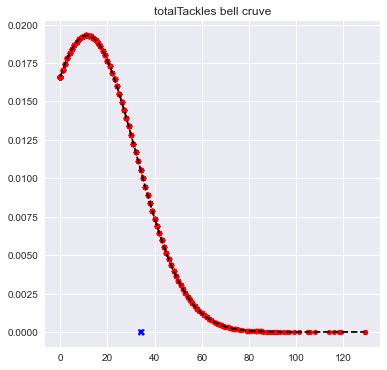

3.6630862871464376
7.814488095966795


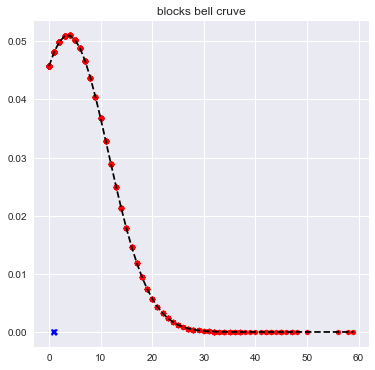

10.316147511636233
19.020480432553523


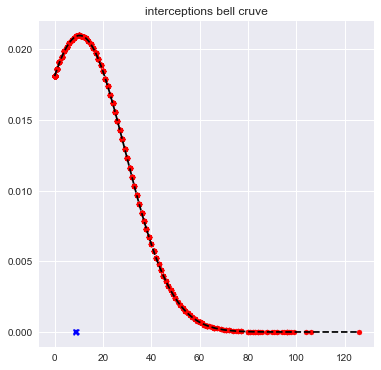

57.8453276047261
100.52838062084184


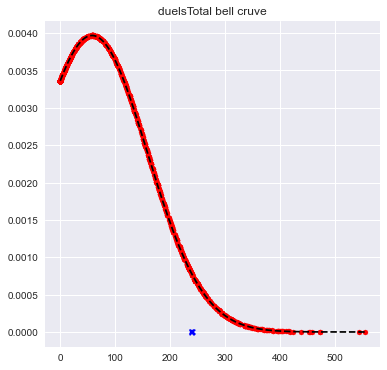

33.24991049051199
58.62160440974282


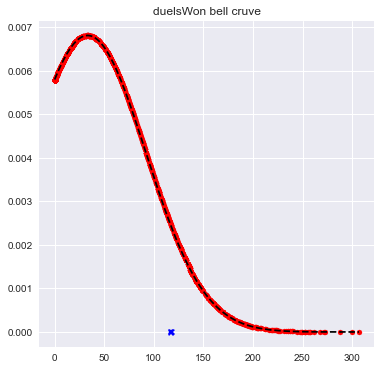

5.197278911564626
12.602750615032745


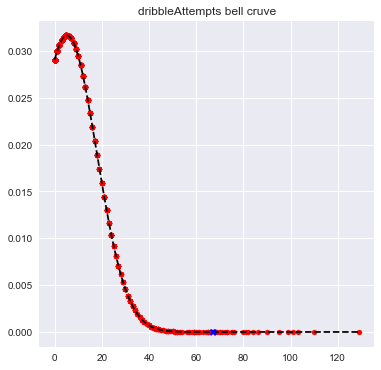

3.199785177228786
7.688868362490396


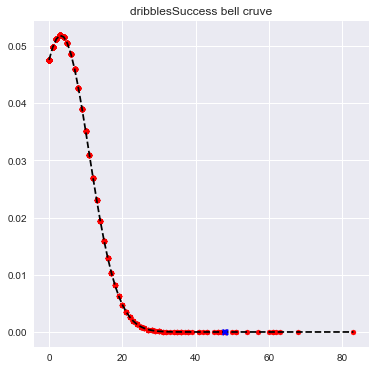

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


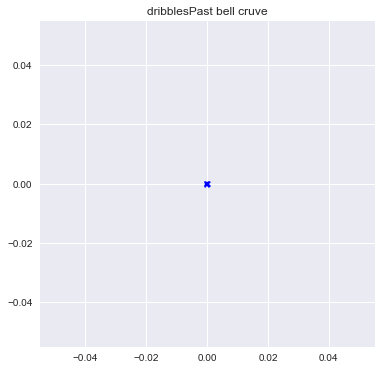

4.31077694235589
8.545496394811678


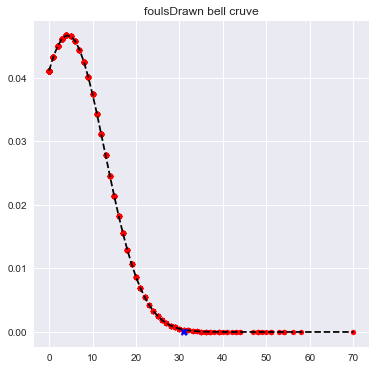

5.621195846759757
10.098392161194358


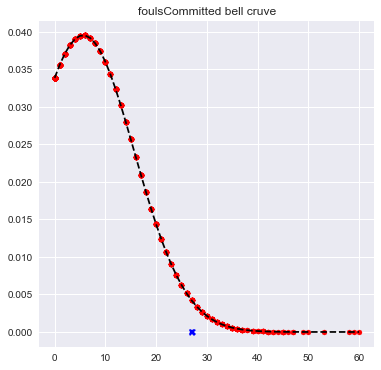

2.625134264232009
2.470485686150562


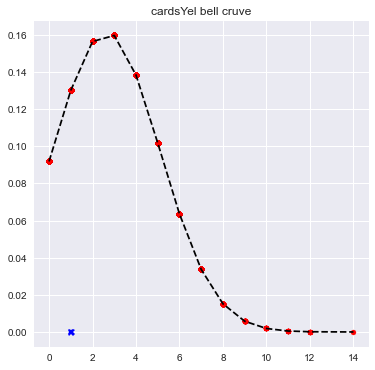

0.04940923737916219
0.22000026465634814


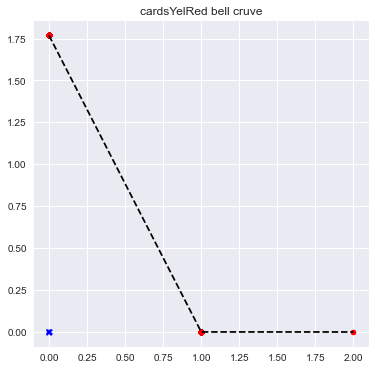

0.07053347654851415
0.2723075762498068


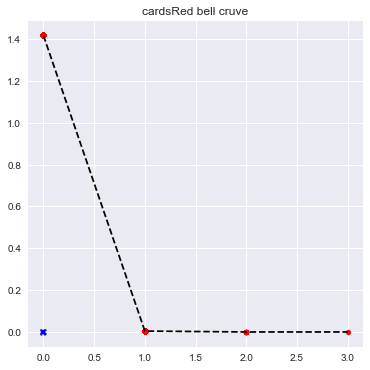

0.016827783745076978
0.1393158751021907


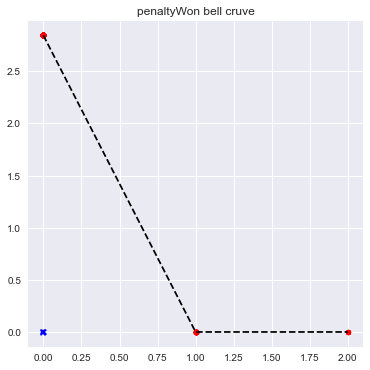

0.09738632295023272
0.36175513997069325


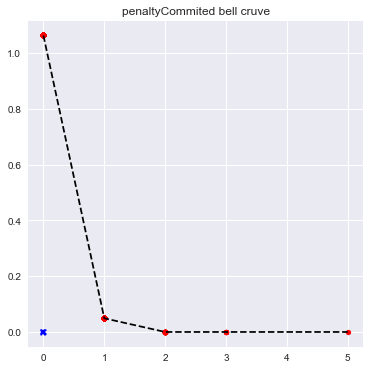

0.0035803795202291443
0.07560283139445079


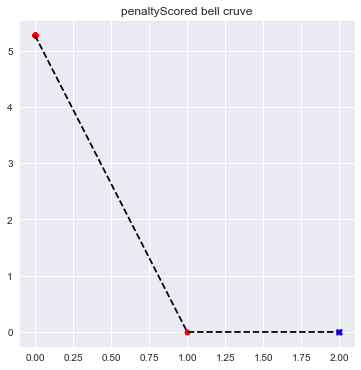

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


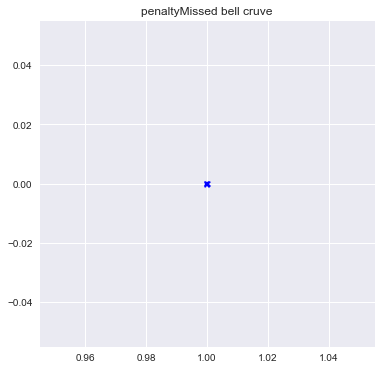

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


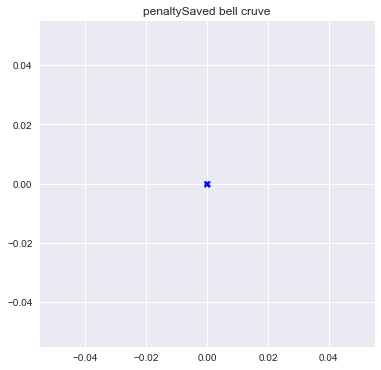

In [41]:
n = 0
for index, row in df.iterrows(): 
    for dfs in (dfAttacker,dfMidfield,dfDefender):
        if n == 0: 
            print('ATTACKERS BELL CURVE')
        elif n == 1: 
            print('MIDFIELDERS BELL CURVE')
        elif n == 2: 
            print('DEFENDERS BELL CURVE')
        for col in to_generate:

            #To place data of a given player
            mark = df.iloc[7909][col]

            # To generate an array of x-values
            x = dfs[col].sort_values(ascending = True)

            # To generate an array of
            # y-values using corresponding x-values
            y = pdf(dfs[col].sort_values(ascending = True))

            # Plotting the bell-shaped curve
            plt.style.use('seaborn')
            plt.figure(figsize = (6, 6))
            plt.plot(x, y, color = 'black',\
                    linestyle = 'dashed')
            plt.plot(mark,0, marker="X", label="points",color = 'blue')
            plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
            plt.title(str(col)+ ' bell cruve')
            plt.show()
        n += 1

In [39]:
#df[df['rating']>=7.2]#.max()
#df['rating'].max()

In [40]:
df

,index,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,firstname_new,fullname_new,Goal contribution,PFA discrim
0,1,19153,Gareth,Barry,39.0,England,183cm,78kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gareth,GarethBarry,NaN,False
1,2,19203,Ashley,Cole,41.0,England,176cm,66kg,False,42,Arsenal,2.0,2.0,180.0,Defender,0.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ashley,AshleyCole,NaN,False
2,4,50978,Justin,Hoyte,36.0,TrinidadandTobago,180cm,68kg,False,42,Arsenal,1.0,0.0,1.0,Defender,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Justin,JustinHoyte,NaN,False
3,5,77110,Thomas,LøvendahlSørensen,45.0,Denmark,196cm,89kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,0.000000,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thomas,ThomasLøvendahlSørensen,NaN,False
4,6,83026,Peter,Whittingham,34.0,England,178cm,63kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,0.000000,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,PeterWhittingham,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,10761,50828,Zack,Steffen,27.0,USA,191cm,86kg,False,50,ManchesterCity,1.0,1.0,90.0,Goalkeeper,6.300000,False,0.0,0.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20/21,KevinDeBruyne,1.0,38.0,27.0,5.0,6.0,83.0,32.0,51.0,86.0,Zack,ZackSteffen,0.000000,False
8287,10764,17,Christian,Pulisic,24.0,USA,172cm,69kg,False,49,Chelsea,27.0,18.0,1735.0,Midfielder,6.842307,False,9.0,6.0,11.0,32.0,16.0,4.0,0.0,2.0,0.0,662.0,26.0,20.0,19.0,2.0,12.0,276.0,120.0,108.0,49.0,0.0,33.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,4.0,38.0,19.0,10.0,9.0,58.0,36.0,22.0,67.0,Christian,ChristianPulisic,0.103448,False
8288,10766,2294,Willian,BorgesdaSilva,34.0,Brazil,175cm,77kg,False,42,Arsenal,25.0,16.0,1406.0,Attacker,7.004000,False,9.0,10.0,17.0,13.0,3.0,1.0,0.0,5.0,0.0,677.0,32.0,23.0,13.0,0.0,8.0,106.0,56.0,18.0,13.0,0.0,21.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,8.0,38.0,18.0,7.0,13.0,55.0,39.0,16.0,61.0,Willian,WillianBorgesdaSilva,0.109091,False
8289,10767,18897,DeAndreRoselle,Yedlin,29.0,USA,172cm,75kg,False,34,NewcastleUnited,6.0,5.0,437.0,Defender,6.516666,False,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0,3.0,17.0,9.0,1.0,7.0,31.0,18.0,2.0,1.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,KevinDeBruyne,12.0,38.0,12.0,9.0,17.0,46.0,62.0,-16.0,45.0,DeAndre,DeAndreYedlin,0.000000,False
